In [9]:
import pandas as pd                                                # Para manipulación de datos, CSV I/O (e.g. pd.read_csv).
import numpy as np                                                 # Para álgebra linear (Operaciones de matrices).
import tensorflow as tf                                             # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow import keras                                        # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras import layers                                 # Para construir y entrenar modelos de aprendizaje profundo.
import matplotlib.pyplot as plt                                    # Para visualización de datos.
import seaborn as sns                                              # Para visualización de datos.
from ucimlrepo import fetch_ucirepo                                # Para obtener datasets de UCI Machine Learning Repository.
from sklearn.preprocessing import StandardScaler                   # Para normalizar los datos.
from sklearn.model_selection import train_test_split               # Para dividir los datos en conjuntos de entrenamiento y pruebas.
from sklearn.metrics import accuracy_score, classification_report   # Para evaluar el rendimiento del modelo.

# **Paso 1: Dataset**

## Obtención del cuadro de datos

In [10]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Construcción del cuadro de datos para los dos tipos de vino (con variables categóricas):
df = pd.DataFrame(wine_quality.data.original)

# **Paso 2: Comprensión del dataset**

## Análisis de los datos

In [24]:
# Mostrar las primeras filas del dataset
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
# Estadísticas descriptivas del dataset
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [14]:
# Identificar las columnas del dataset
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

## Resumen

Wine Quality Dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 6497

    :Number of Attributes: 13 (12 numeric features and 1 target)

    :Attribute Information:
        - fixed_acidity
        - volatile_acidity
        - citric_acid
        - residual_sugar
        - chlorides
        - free_sulfur_dioxide
        - total_sulfur_dioxide
        - density
        - pH
        - sulphates
        - alcohol
        - quality (score between 0 and 10)
        - color (red or white)

    :Summary Statistics:

    ===================================== ======
                                           Min    Max
    ===================================== ====== ======
    fixed_acidity                          3.8    14.2
    volatile_acidity                       0.08   1.58
    citric_acid                            0.0    1.0
    residual_sugar                         0.6    65.8
    chlorides                              0.012  0.611
    free_sulfur_dioxide                    1.0    289.0
    total_sulfur_dioxide                   6.0    440.0
    density                                0.9901 1.0037
    pH                                     2.72   4.01
    sulphates                              0.22   2.0
    alcohol                                8.4    14.9
    quality                                3      9
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution:
        - Quality 0 to 6: 63 instances
        - Quality 6 to 9: 1319 instances

    :Creator: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
    :Donor: Paulo Cortez (pcortez@ics.uminho.pt), Antonio Cerdeira, Fernando Almeida, Telmo Matos and José Reis (see also http://www3.dsi.uminho.pt/pcortez)

    :Date: March, 2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

.. topic:: References

   - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
   - S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

## Análisis Gráfico

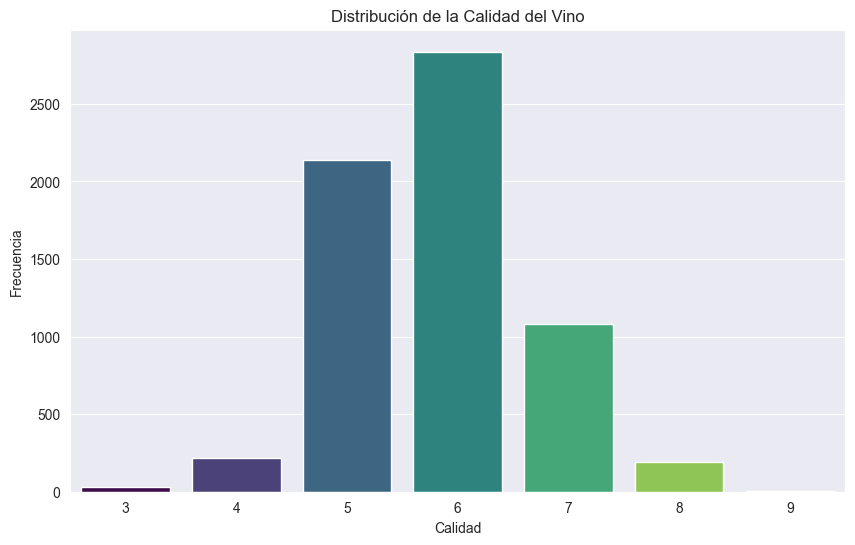

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, hue='quality', palette='viridis', dodge=False, legend=False)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()


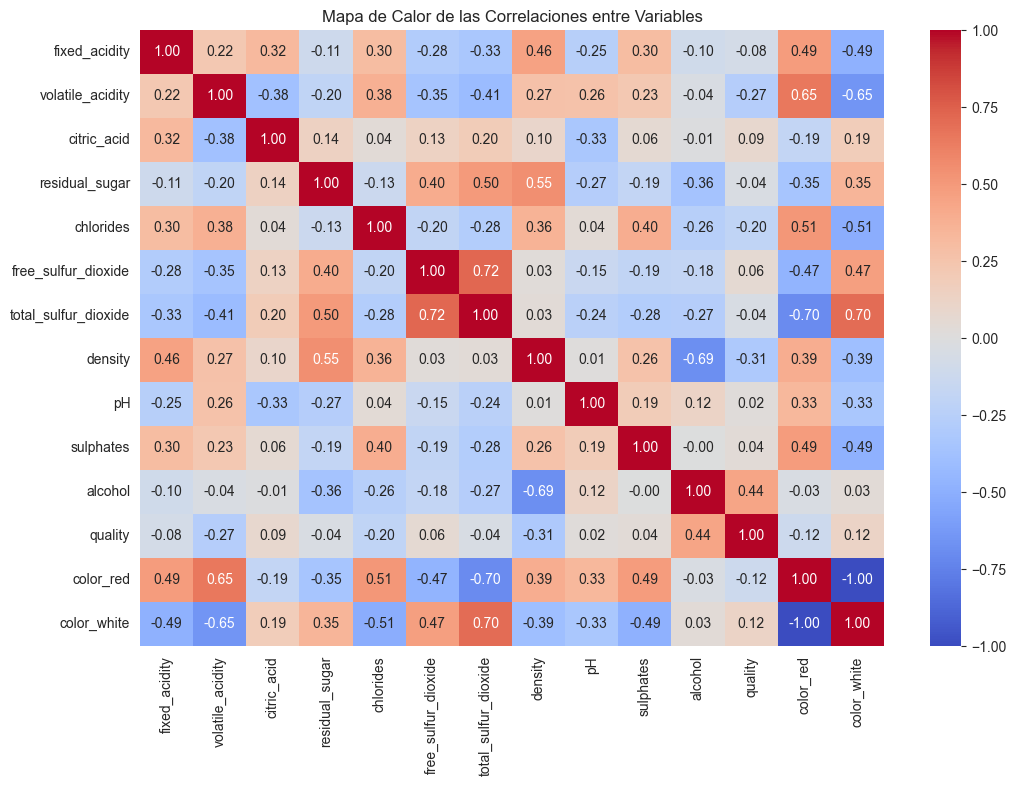

In [25]:
df_dummed = pd.get_dummies(df, columns=['color'])
correlation_matrix = df_dummed.corr()

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de las Correlaciones entre Variables')
plt.show()

# **Paso 3: Preprocesamiento de la información**


## Dumificacion de variables categóricas

In [26]:
# Dumificación de la variable categórica "color"
df = pd.get_dummies(df, columns=['color'])

## Identificación y Tratamiento de Valores Nulos

In [27]:
# Verificar la existencia de valores nulos (no hay)
print(df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color_red               0
color_white             0
dtype: int64


## Normalización de Datos

In [41]:
# Normalización de las características
features = df.drop('quality', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear un nuevo DataFrame con las características normalizadas
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['quality'] = df['quality']

## Búsqueda y Eliminación de Datos Atípicos


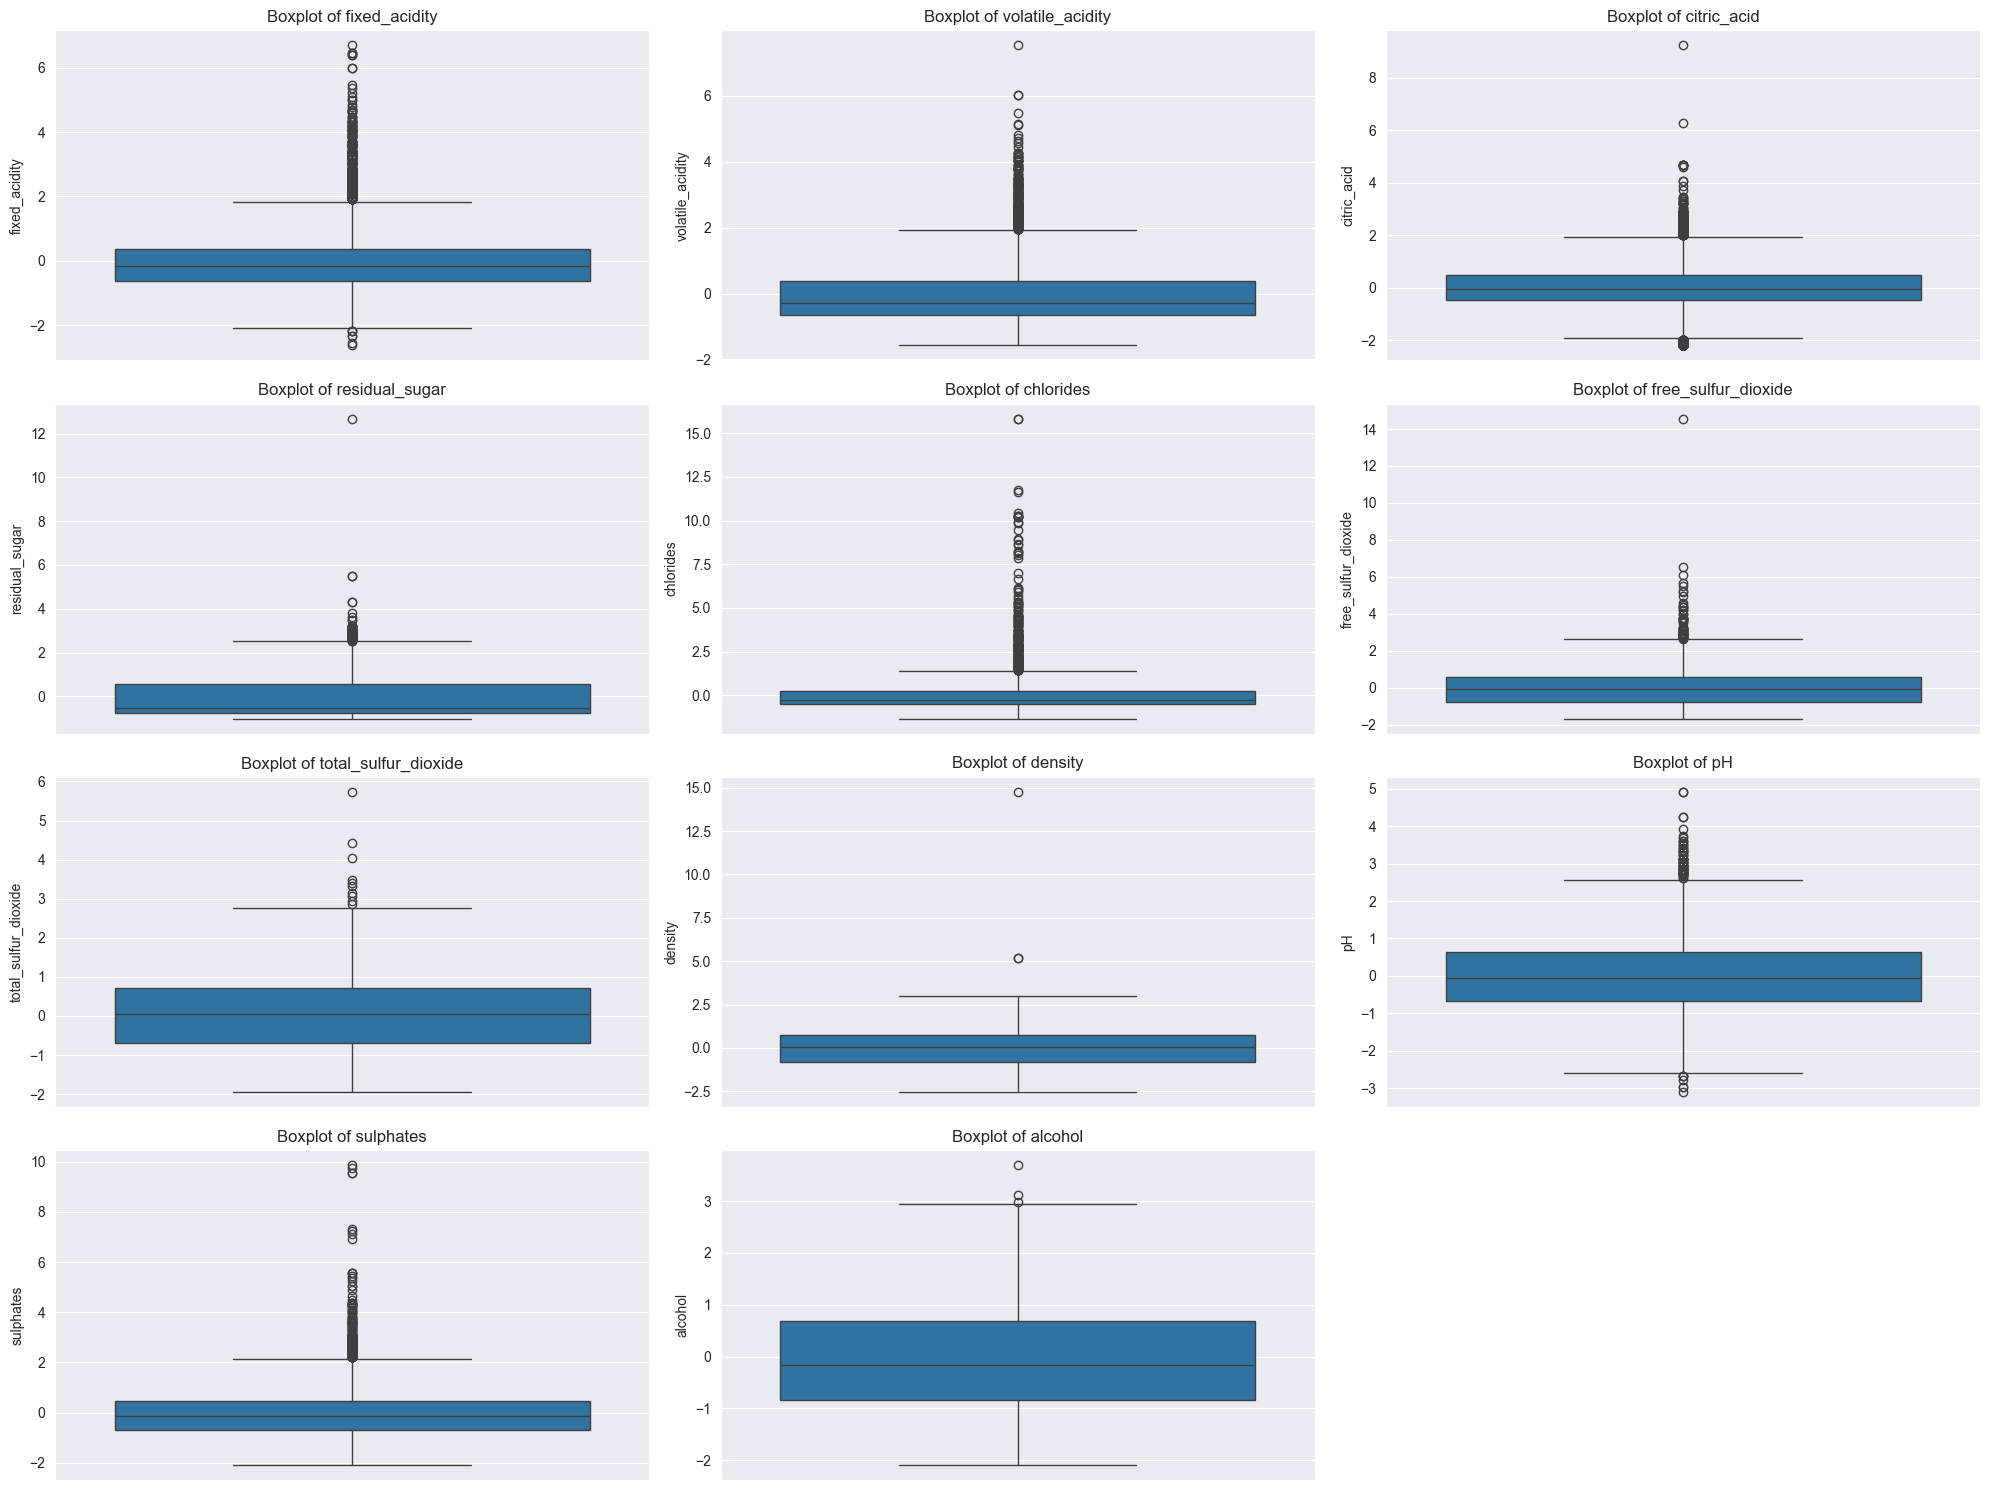

In [42]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_scaled.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_scaled, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [46]:
# Crea una copia del DataFrame original
cleaned_df = df_scaled.copy()

# Itera sobre cada columna (excepto la última)
for column in cleaned_df.columns[:-1][:11]:
    
    # Calcula el rango intercuartílico (IQR)
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 357
Valores atípicos eliminados en la columna 'volatile_acidity': 374
Valores atípicos eliminados en la columna 'citric_acid': 474
Valores atípicos eliminados en la columna 'residual_sugar': 41
Valores atípicos eliminados en la columna 'chlorides': 349
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 54
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 9
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 45
Valores atípicos eliminados en la columna 'sulphates': 142
Valores atípicos eliminados en la columna 'alcohol': 0


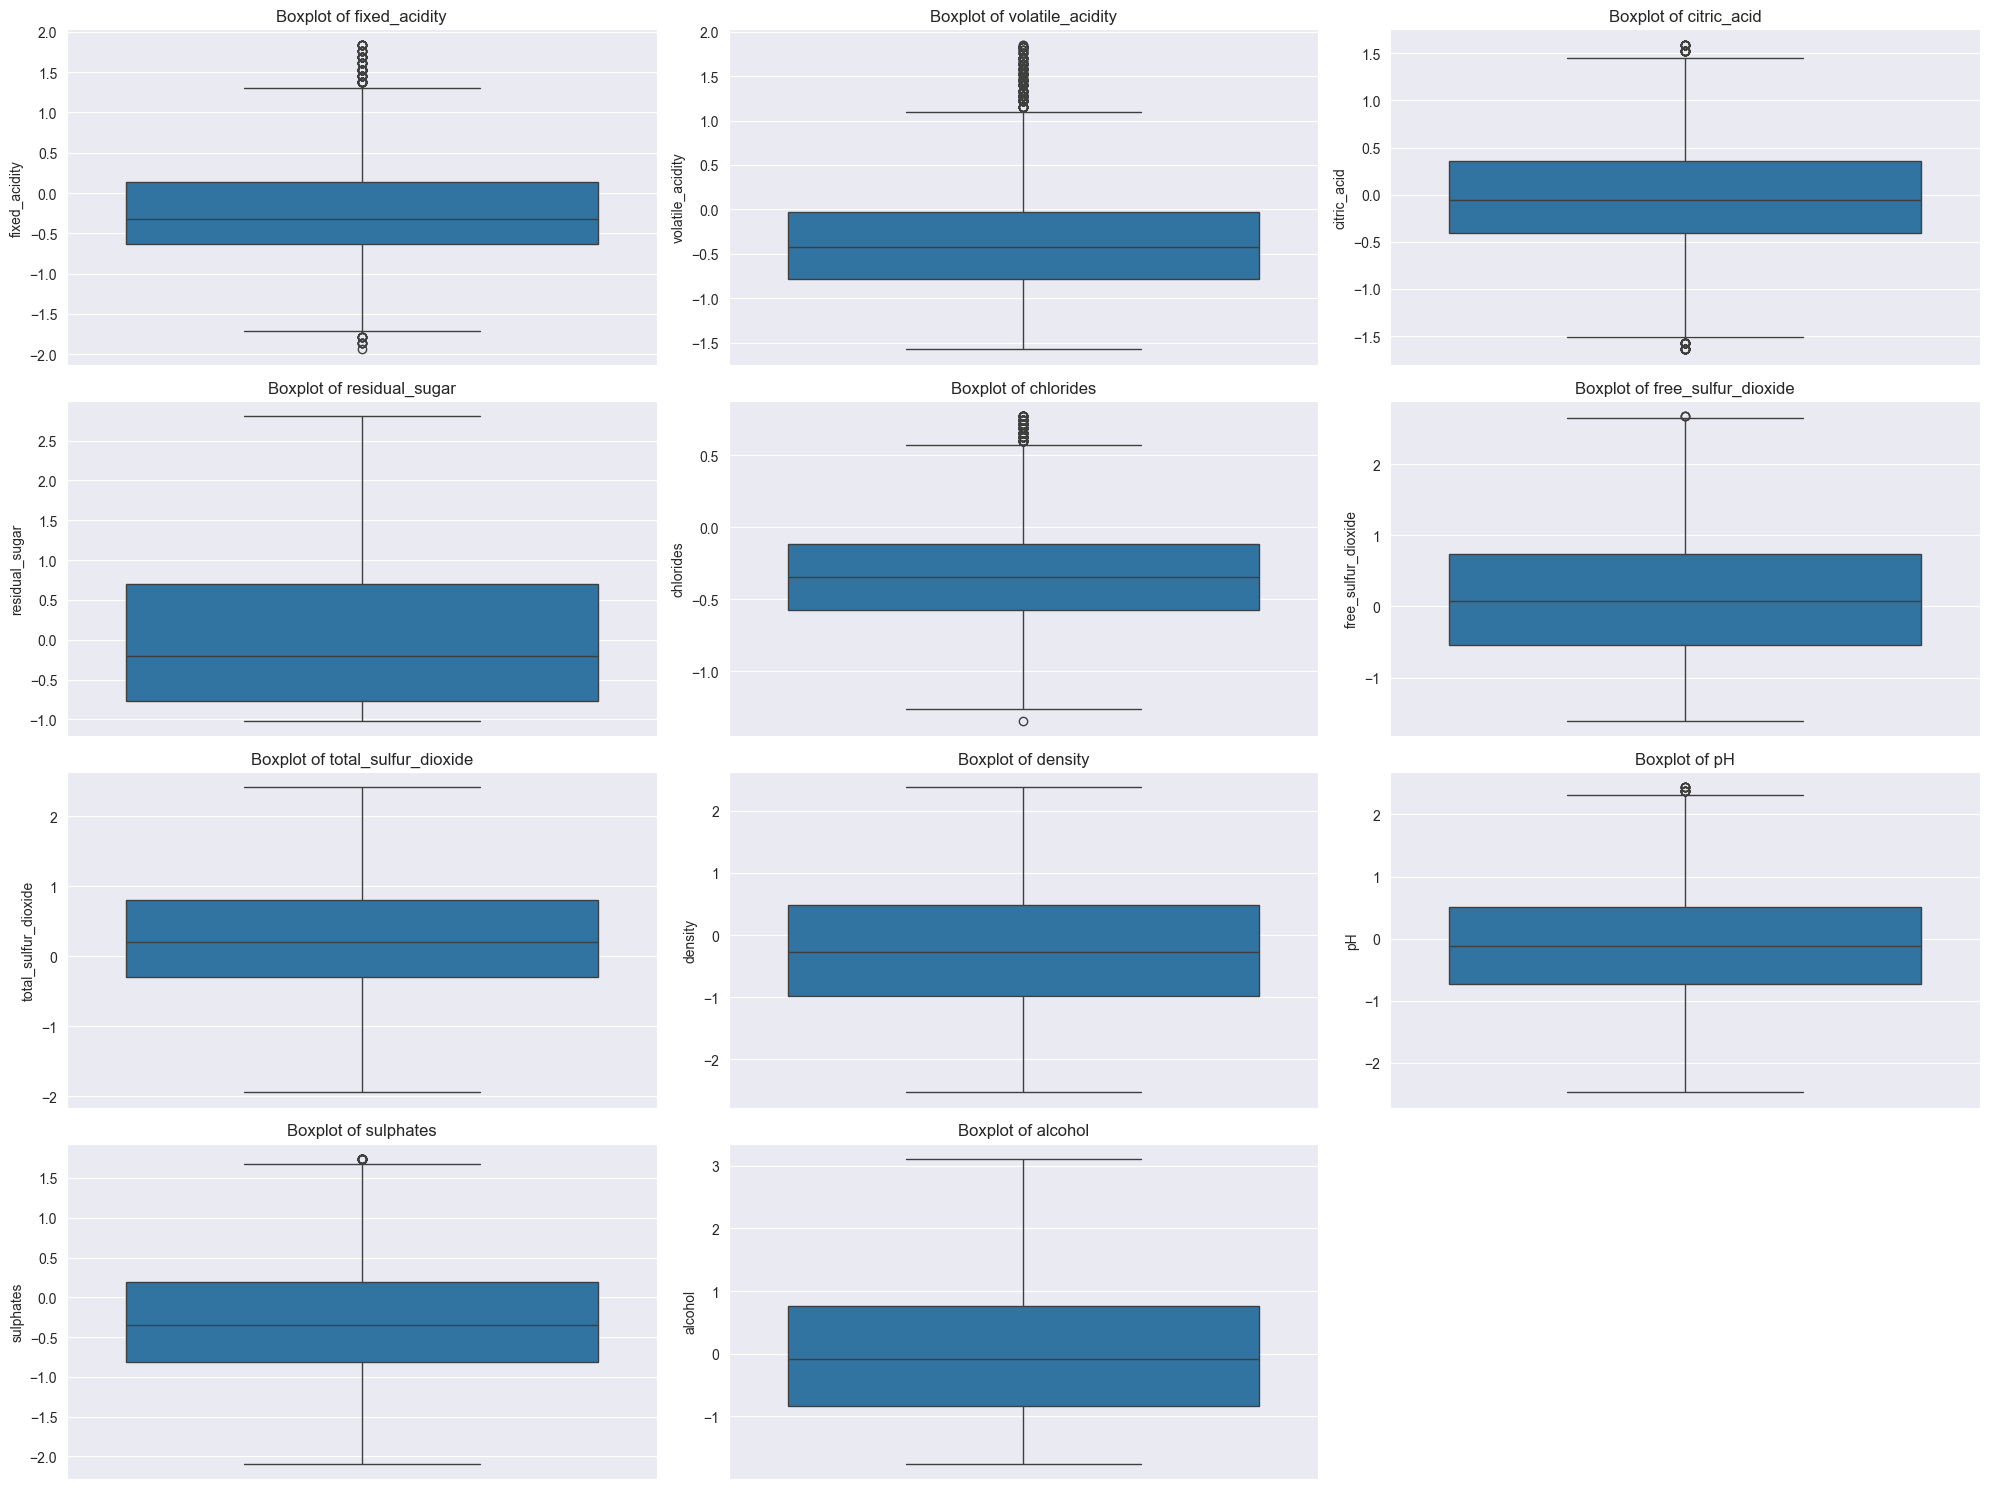

In [47]:
# Visualización de los boxplots después de eliminar valores atípicos
plt.figure(figsize=(20, 15))
for i, column in enumerate(cleaned_df.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=cleaned_df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [48]:
# Itera sobre cada columna (excepto la última)
for column in cleaned_df.columns[:-1][:11]:
    # Calcula el rango intercuartílico (IQR)
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 110
Valores atípicos eliminados en la columna 'volatile_acidity': 201
Valores atípicos eliminados en la columna 'citric_acid': 103
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 154
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 29
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 19
Valores atípicos eliminados en la columna 'sulphates': 54
Valores atípicos eliminados en la columna 'alcohol': 0


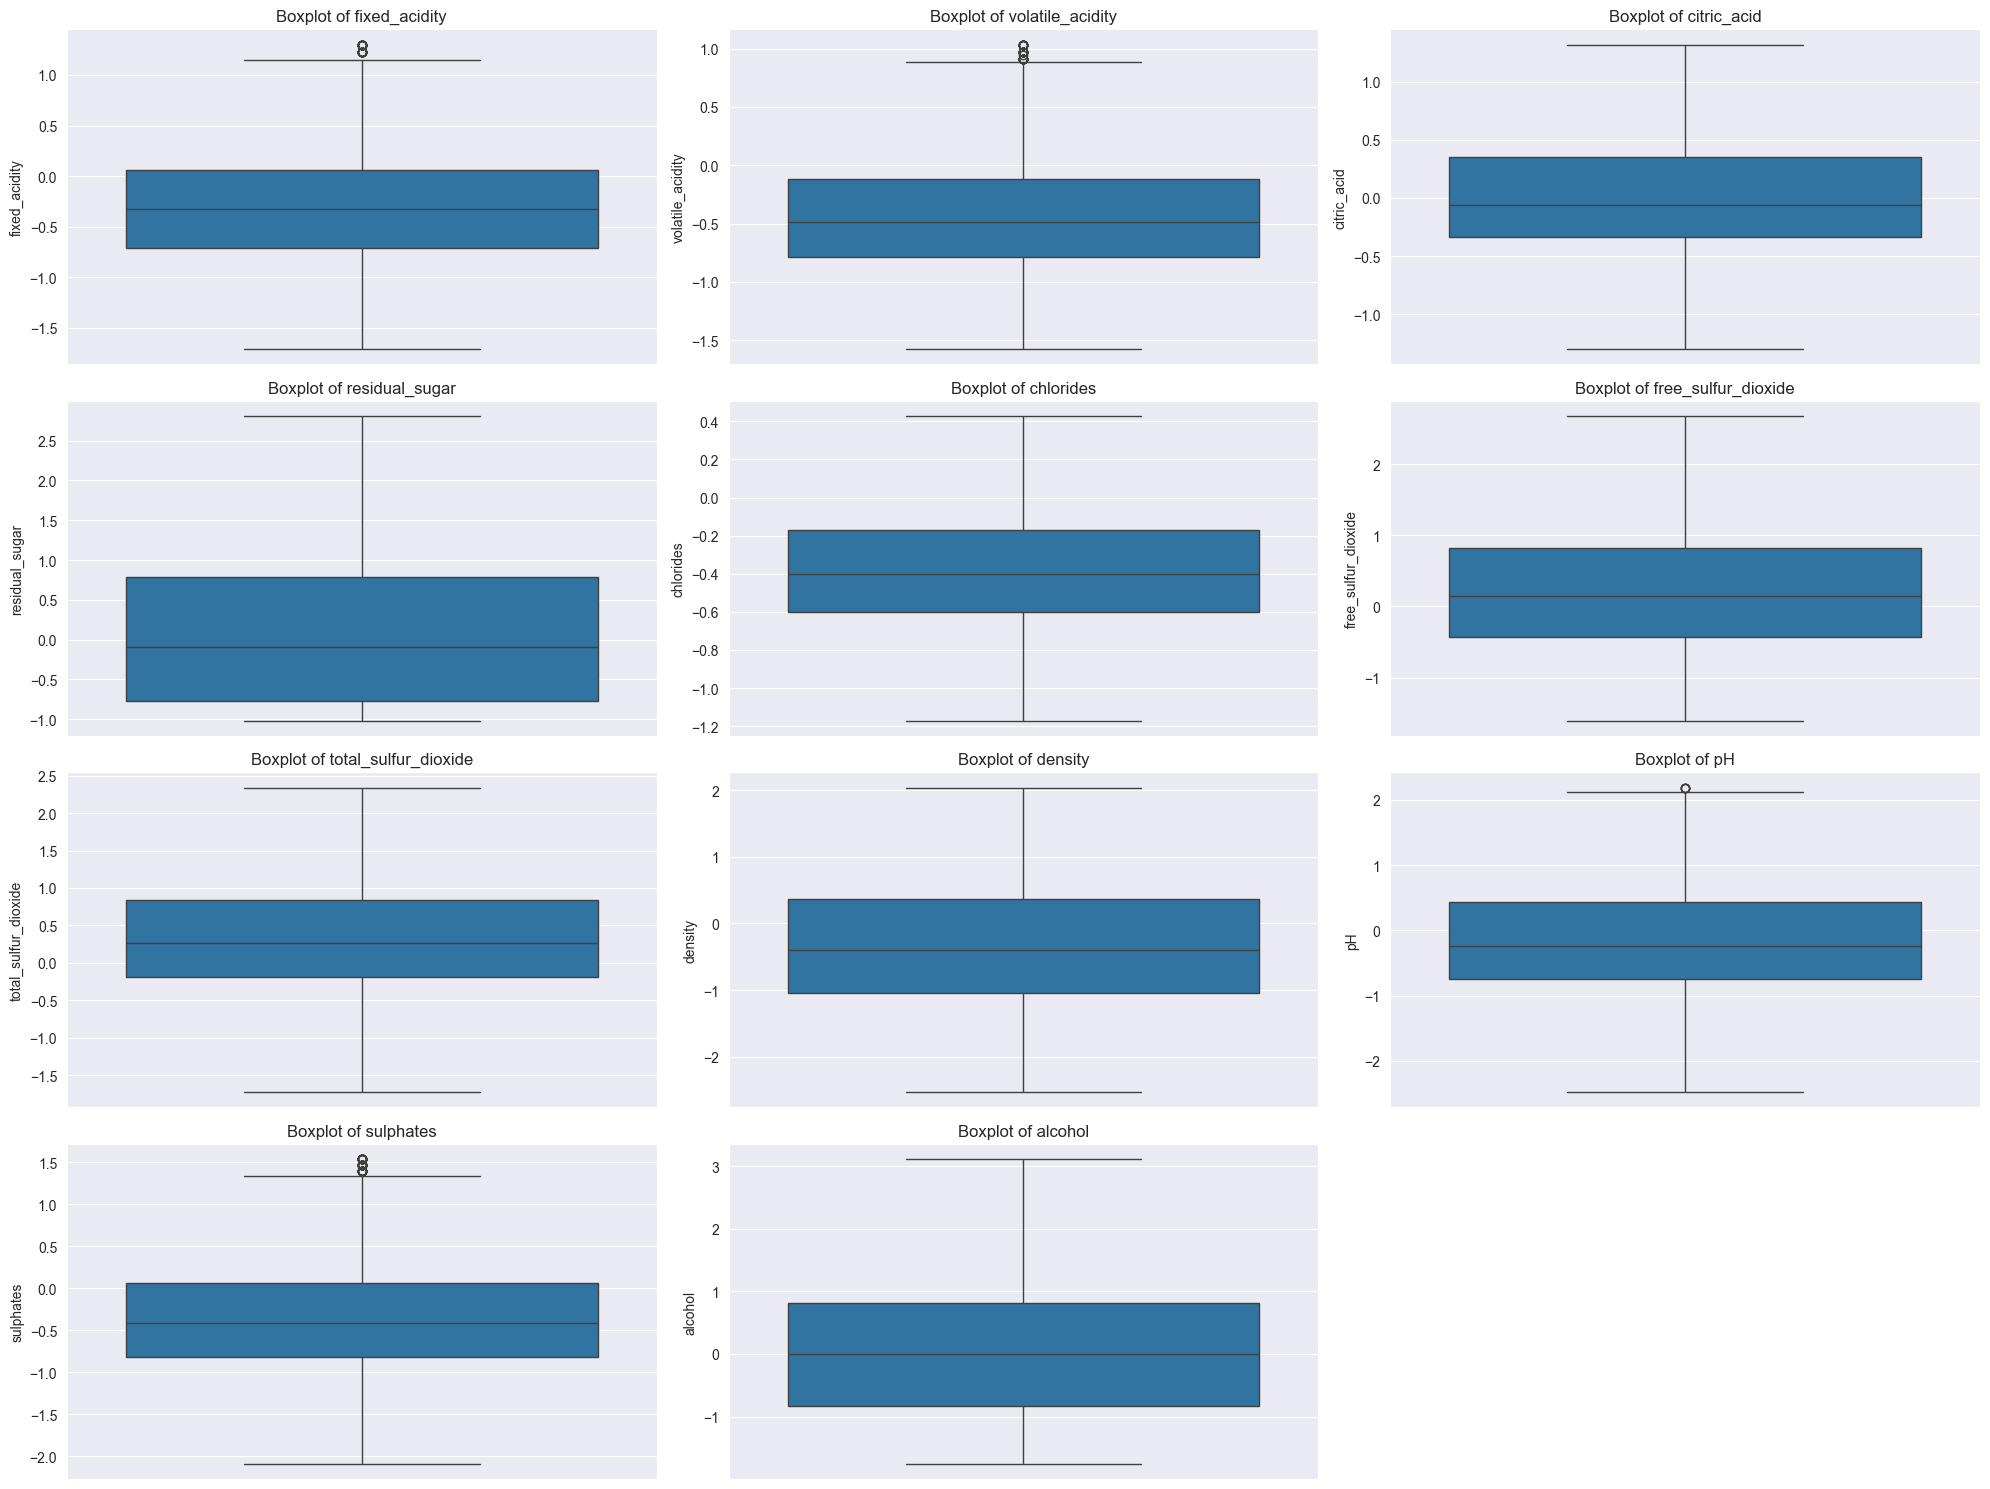

In [49]:
# Visualización de los boxplots después de eliminar valores atípicos
plt.figure(figsize=(20, 15))
for i, column in enumerate(cleaned_df.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=cleaned_df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [50]:
# Itera sobre cada columna (excepto la última)
for column in cleaned_df.columns[:-1][:11]:
    # Calcula el rango intercuartílico (IQR)
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 34
Valores atípicos eliminados en la columna 'volatile_acidity': 37
Valores atípicos eliminados en la columna 'citric_acid': 0
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 0
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 1
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 4
Valores atípicos eliminados en la columna 'sulphates': 59
Valores atípicos eliminados en la columna 'alcohol': 0


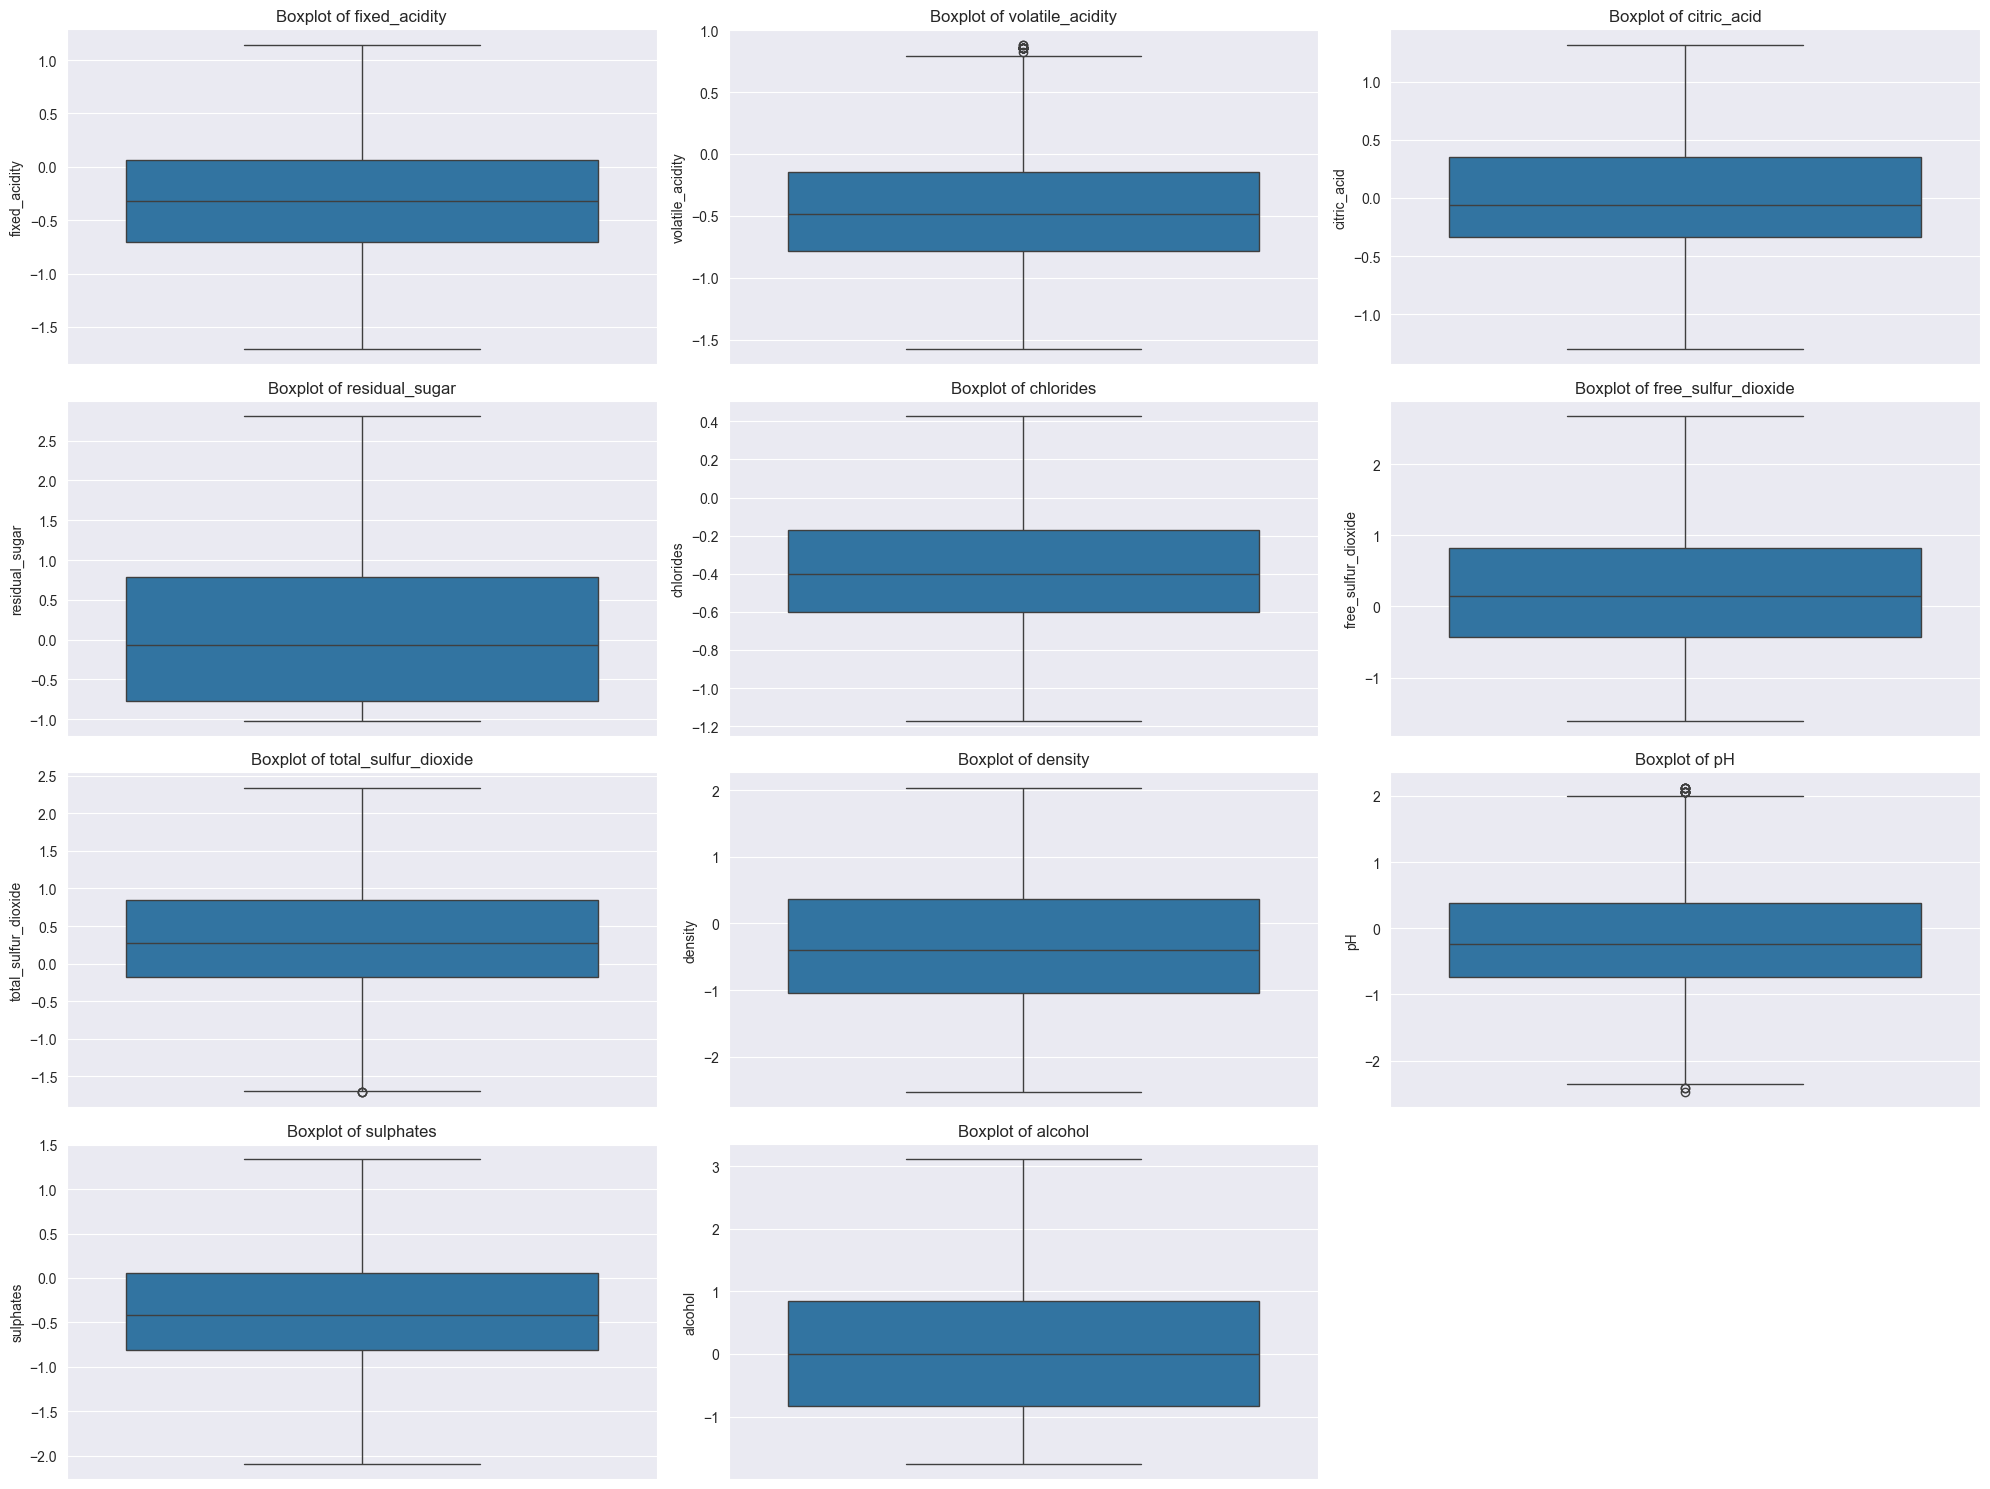

In [51]:
# Visualización de los boxplots después de eliminar valores atípicos
plt.figure(figsize=(20, 15))
for i, column in enumerate(cleaned_df.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=cleaned_df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [52]:
# Itera sobre cada columna (excepto la última)
for column in cleaned_df.columns[:-1][:11]:
    # Calcula el rango intercuartílico (IQR)
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 0
Valores atípicos eliminados en la columna 'volatile_acidity': 18
Valores atípicos eliminados en la columna 'citric_acid': 0
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 0
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 4
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 5
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 16
Valores atípicos eliminados en la columna 'sulphates': 0
Valores atípicos eliminados en la columna 'alcohol': 0


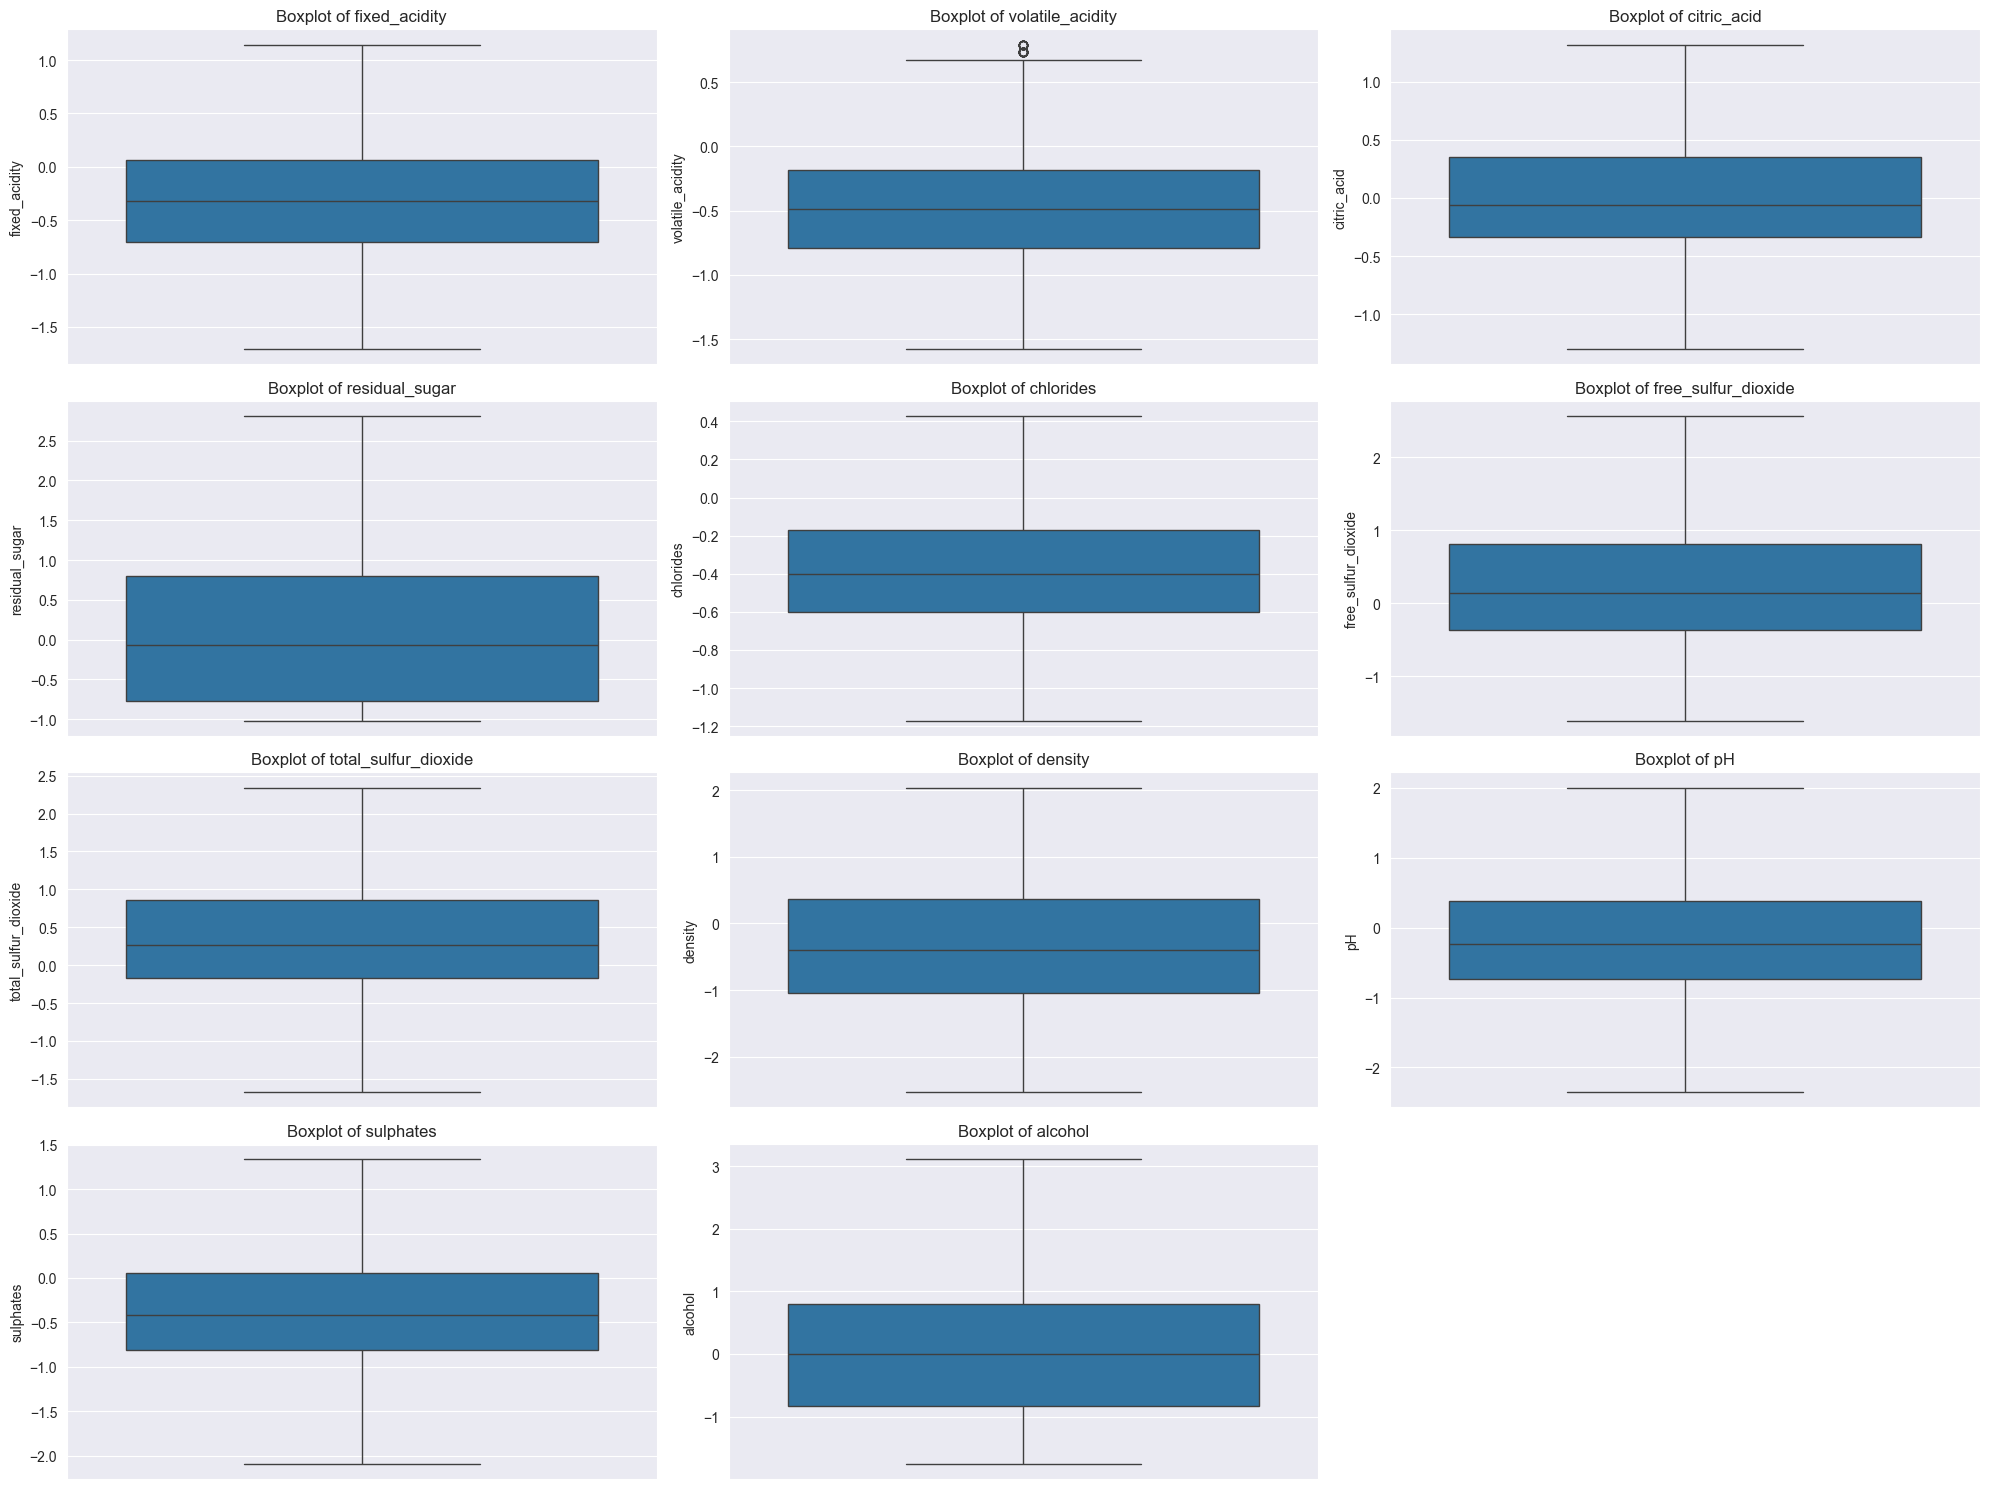

In [53]:
# Visualización de los boxplots después de eliminar valores atípicos
plt.figure(figsize=(20, 15))
for i, column in enumerate(cleaned_df.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=cleaned_df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [54]:
# Itera sobre cada columna (excepto la última)
for column in cleaned_df.columns[:-1][:11]:
    # Calcula el rango intercuartílico (IQR)
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 0
Valores atípicos eliminados en la columna 'volatile_acidity': 31
Valores atípicos eliminados en la columna 'citric_acid': 0
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 0
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 0
Valores atípicos eliminados en la columna 'sulphates': 0
Valores atípicos eliminados en la columna 'alcohol': 0


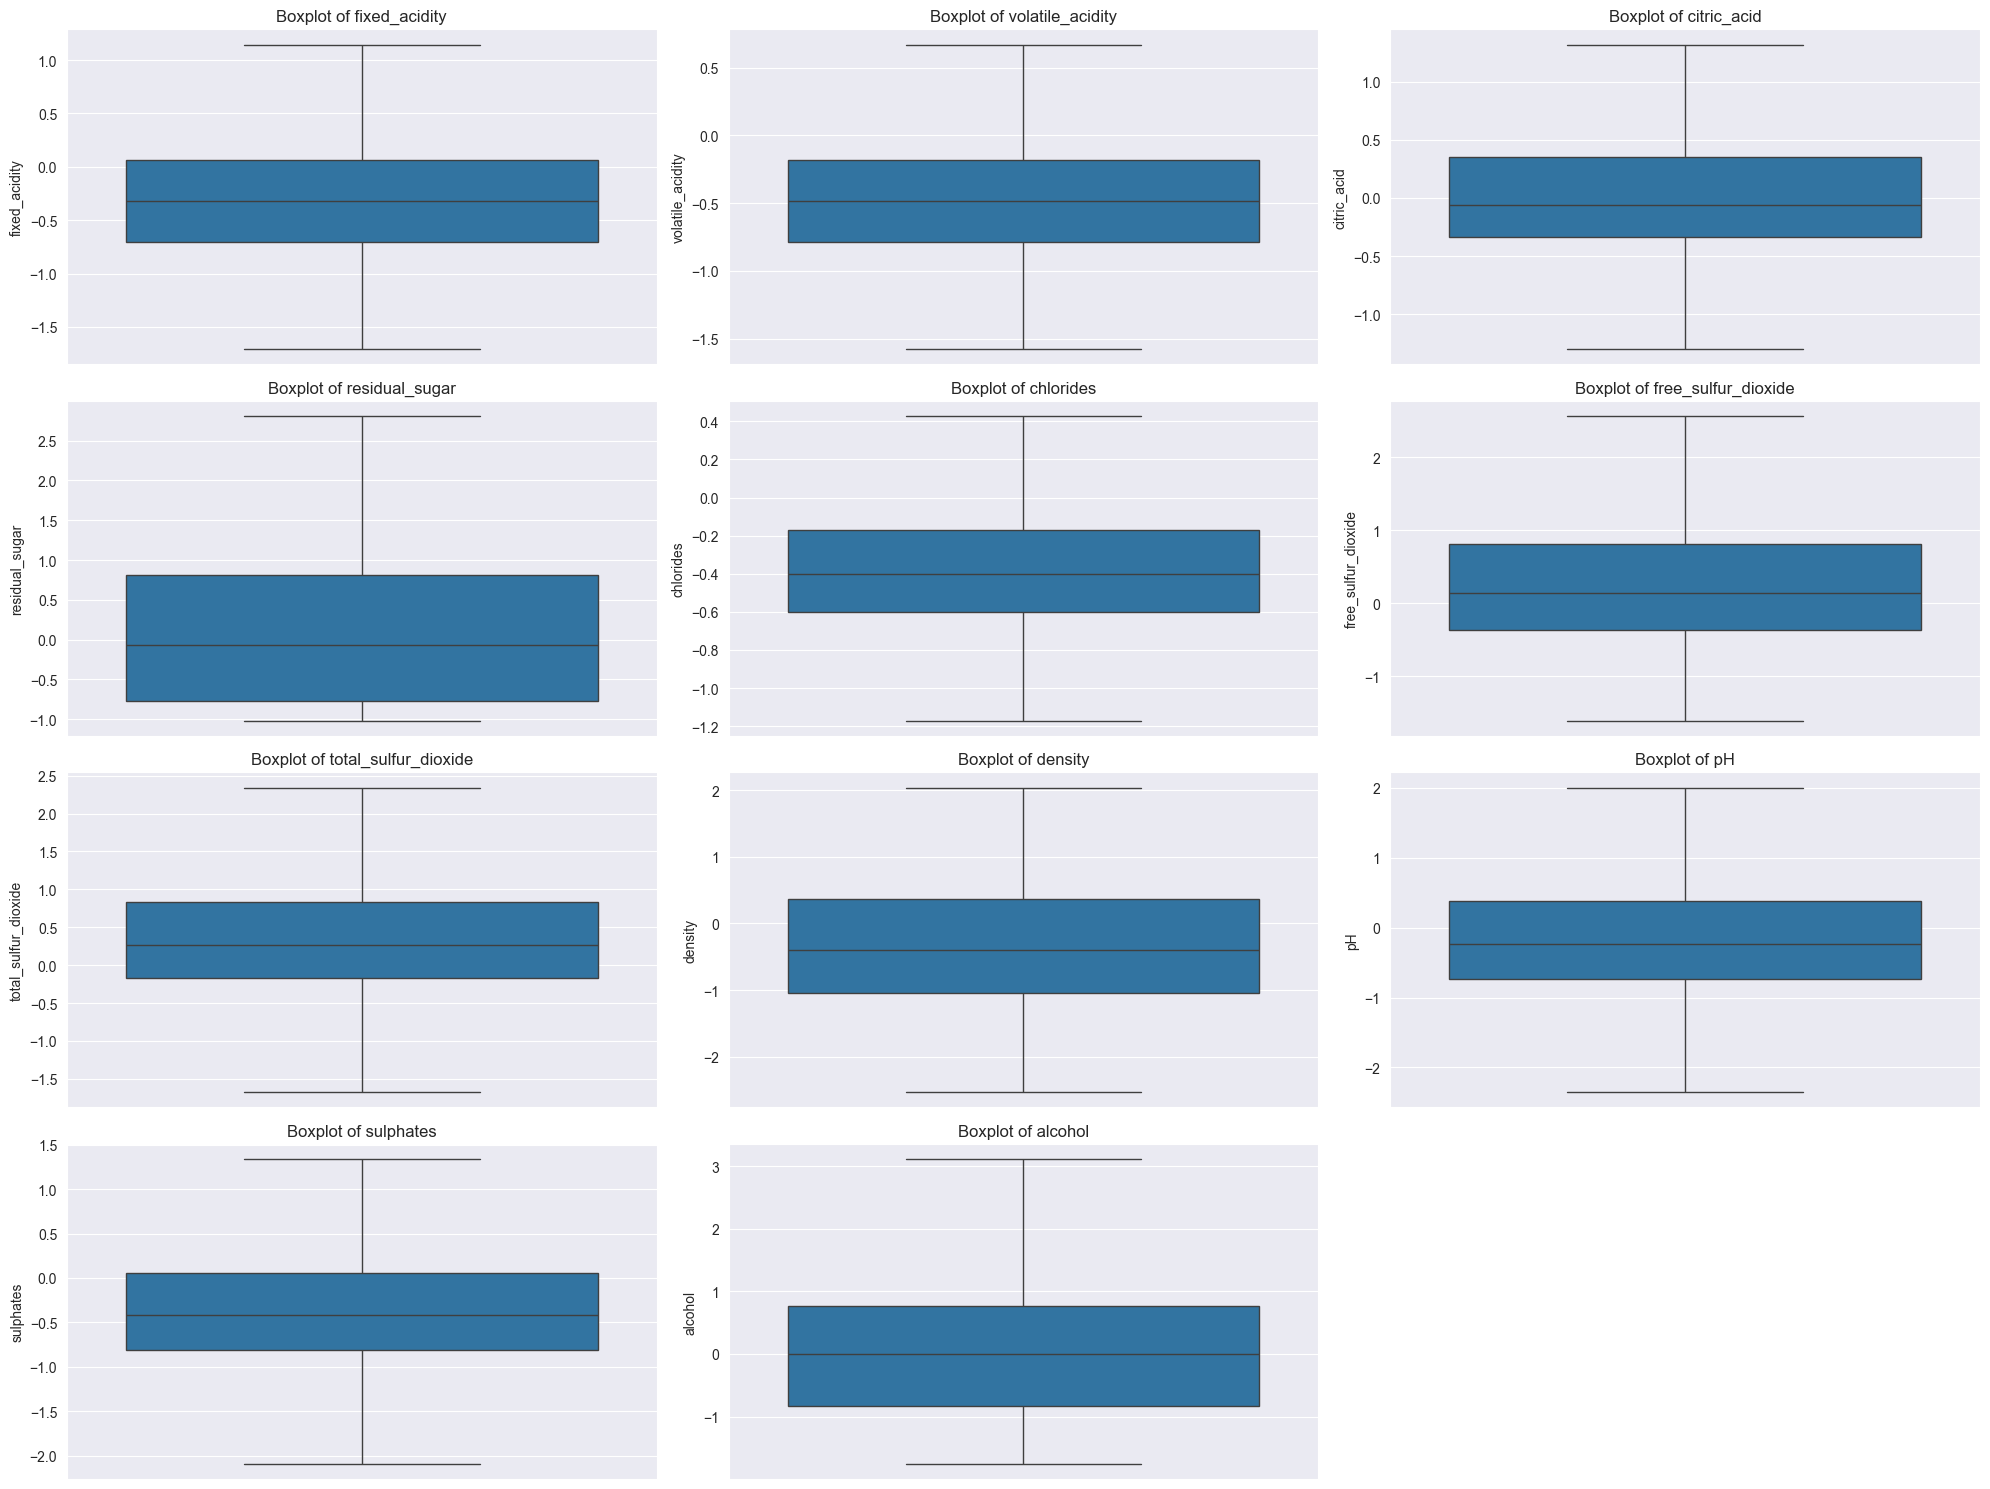

In [55]:
# Visualización de los boxplots después de eliminar valores atípicos
plt.figure(figsize=(20, 15))
for i, column in enumerate(cleaned_df.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=cleaned_df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [56]:
# Itera sobre cada columna (excepto la última)
for column in cleaned_df.columns[:-1][:11]:
    # Calcula el rango intercuartílico (IQR)
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 0
Valores atípicos eliminados en la columna 'volatile_acidity': 0
Valores atípicos eliminados en la columna 'citric_acid': 0
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 0
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 0
Valores atípicos eliminados en la columna 'sulphates': 0
Valores atípicos eliminados en la columna 'alcohol': 0


In [57]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3773 entries, 37 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3773 non-null   float64
 1   volatile_acidity      3773 non-null   float64
 2   citric_acid           3773 non-null   float64
 3   residual_sugar        3773 non-null   float64
 4   chlorides             3773 non-null   float64
 5   free_sulfur_dioxide   3773 non-null   float64
 6   total_sulfur_dioxide  3773 non-null   float64
 7   density               3773 non-null   float64
 8   pH                    3773 non-null   float64
 9   sulphates             3773 non-null   float64
 10  alcohol               3773 non-null   float64
 11  color_red             3773 non-null   float64
 12  color_white           3773 non-null   float64
 13  quality               3773 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 442.1 KB


# **Paso 4: Construcción del dataset**

In [63]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de pruebas (80-20)
X = cleaned_df.drop('quality', axis=1)
y = cleaned_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Paso 5: Elaboración del modelo**

## Perceptrón

In [72]:
perceptron = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(units=1, activation='sigmoid', use_bias=True)
])

## Red neuronal con una capa oculta con un número de neuronas igual al número de entradas:

In [73]:
model_1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(units=X_train.shape[1], activation='sigmoid', use_bias=True),
    layers.Dense(units=1, activation='sigmoid', use_bias=True)
])

## Red neuronal con dos capas ocultas con dos neuronas en cada capa oculta:

In [75]:
model_2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(units=X_train.shape[1], activation='sigmoid', use_bias=True),
    layers.Dense(units=2, activation='sigmoid', use_bias=True),
    layers.Dense(units=1, activation='sigmoid', use_bias=True)
])

# **Paso 6: Análisis de Resultados**

## Compilar los modelos

### Compilar modelo #1 (Perceptrón)

In [77]:
perceptron.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.AUC(), tf.keras.metrics.F1Score()])

### Compilar modelo #2 (Red neuronal con una capa oculta)

In [78]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.AUC(), tf.keras.metrics.F1Score()])

### Compilar modelo #3 (Red neuronal con dos capas ocultas)

In [79]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.AUC(), tf.keras.metrics.F1Score()])

## Entrenar los modelos

### Entrenar el modelo #1 (Perceptrón)

In [80]:
# Entrenar los modelos
perceptron.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(X_test, y_test))

### Entrenar el modelo #2 (Red neuronal con una capa oculta)

In [81]:
model_1.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(X_test, y_test))

### Entrenar el modelo #3 (Red neuronal con dos capas ocultas)

In [82]:
model_2.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(X_test, y_test))

## Después de entrenar los modelos, evaluamos su rendimiento en los datos de ejemplo:


In [83]:
print("Perceptrón:")
print(perceptron.evaluate(X_test, y_test))

print("\nRed neuronal con una capa oculta:")
print(model_1.evaluate(X_test, y_test))

print("\nRed neuronal con dos capas ocultas:")
print(model_2.evaluate(X_test, y_test))

Perceptrón:
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - auc_1: 0.0000e+00 - f1_score: 1.6899 - loss: -2189.4402 - precision_1: 1.0000 - recall_1: 0.9820
[-2246.443359375, 0.0, 0.9854304790496826, 1.0, 0.0, 1.6953214406967163]

Red neuronal con una capa oculta:
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - auc_2: 0.0000e+00 - f1_score: 1.7119 - loss: -6582.5264 - precision_2: 1.0000 - recall_2: 1.0000 
[-6628.4365234375, 0.0, 1.0, 1.0, 0.0, 1.7133636474609375]

Red neuronal con dos capas ocultas:
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - auc_3: 0.0000e+00 - f1_score: 1.7119 - loss: -1420.5486 - precision_3: 1.0000 - recall_3: 1.0000 
[-1430.4561767578125, 0.0, 1.0, 1.0, 0.0, 1.7133636474609375]


In [84]:
# Para el perceptrón
preds_perceptron = perceptron.predict(X_test)
print("Perceptrón:")
print(classification_report(y_test, preds_perceptron))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Perceptrón:


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [85]:
# Para la red neuronal con una capa oculta (model_1)
preds_model_1 = model_1.predict(X_test)
print("\nRed neuronal con una capa oculta:")
print(classification_report(y_test, preds_model_1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Red neuronal con una capa oculta:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00      15.0
         5.0       0.00      0.00      0.00     188.0
         6.0       0.00      0.00      0.00     380.0
         7.0       0.00      0.00      0.00     143.0
         8.0       0.00      0.00      0.00      29.0

    accuracy                           0.00     755.0
   macro avg       0.00      0.00      0.00     755.0
weighted avg       0.00      0.00      0.00     755.0



/Users/nidhood/Desktop/carpeta sin título/project-3-IA/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nidhood/Desktop/carpeta sin título/project-3-IA/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nidhood/Desktop/carpeta sin título/project-3-IA/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

In [86]:
# Para la red neuronal con dos capas ocultas (model_2)
preds_model_2 = model_2.predict(X_test)
print("\nRed neuronal con dos capas ocultas:")
print(classification_report(y_test, preds_model_2))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Red neuronal con dos capas ocultas:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00      15.0
         5.0       0.00      0.00      0.00     188.0
         6.0       0.00      0.00      0.00     380.0
         7.0       0.00      0.00      0.00     143.0
         8.0       0.00      0.00      0.00      29.0

    accuracy                           0.00     755.0
   macro avg       0.00      0.00      0.00     755.0
weighted avg       0.00      0.00      0.00     755.0



/Users/nidhood/Desktop/carpeta sin título/project-3-IA/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nidhood/Desktop/carpeta sin título/project-3-IA/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nidhood/Desktop/carpeta sin título/project-3-IA/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro